In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
#from catboost import CatBoostClassifier

# Encoders
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

sns.set_theme(style="whitegrid", palette="magma")
sns.color_palette("Paired", 15)
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)

In [7]:
data= pd.read_csv('D:/mlopss/data/train.csv')

In [8]:
data.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [11]:
data.drop(['id'],axis=1, inplace=True)

In [12]:
sorted_dims=[data.x.sort_values().reset_index(drop=True),data.y.sort_values().reset_index(drop=True),data.z.sort_values().reset_index(drop=True)]
pd.concat(sorted_dims,axis=1).head(15)

,x,y,z
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.00,3.71,0.00
3,3.75,3.72,0.00
4,3.75,3.72,0.00
5,3.77,3.72,0.00
6,3.77,3.72,0.00
7,3.77,3.72,0.00
8,3.77,3.72,0.00
9,3.77,3.72,0.00


In [13]:
data['x']=data['x'].replace(0,0.5)
data['y']=data['y'].replace(0,0.5)
data['z']=data['z'].replace(0,0.5)


In [14]:
data[['x','y','z']].describe()

,x,y,z
count,193573.000000,193573.000000,193573.000000
mean,5.715320,5.720100,3.534272
std,1.109384,1.102308,0.688799
min,0.500000,0.500000,0.500000
25%,4.700000,4.710000,2.900000
50%,5.700000,5.720000,3.530000
75%,6.510000,6.510000,4.030000
max,9.650000,10.010000,31.300000


In [15]:
cat_features=[col for col in data.columns if data.dtypes[col]=='object']
cat_features

['cut', 'color', 'clarity']

In [16]:
data[cat_features].head(20)

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
5,Very Good,J,SI1
6,Ideal,E,VS2
7,Premium,G,SI2
8,Ideal,F,IF
9,Good,J,VS1


In [17]:
for cat in data[cat_features]:
    print(cat.title(),data[cat].unique())

Cut ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Color ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Clarity ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [18]:
cut_class = {'Fair': 1, 'Ideal': 4, 'Good': 2, 'Very Good': 3, 'Premium': 5}
color_class= {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

data['cut'] = data['cut'].map(cut_class)  
data['color'] = data['color'].map(color_class)

In [19]:
data[cat_features]

,cut,color,clarity
0,5,5,VS2
1,3,1,SI2
2,4,4,VS1
3,4,4,VS1
4,5,4,VS2
...,...,...,...
193568,4,7,VVS2
193569,5,4,VVS2
193570,3,5,SI1
193571,3,7,SI1


In [20]:
clarity_class = {'FL': 11,'IF': 10,'VVS1': 9, 'VVS2': 8,'VS1': 7,'VS2': 6, 'SI1': 5, 'SI2': 4, 'I1': 3,'I2': 2,'I3': 1}
data['clarity'] = data['clarity'].map(clarity_class)  

In [21]:
data.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,3.912369,4.483843,5.975084,61.820574,57.227675,5.715320,5.720100,3.534272,3969.155414
std,0.462688,0.882241,1.623091,1.501776,1.081704,1.918844,1.109384,1.102308,0.688799,4034.374138
min,0.200000,1.000000,1.000000,3.000000,52.100000,49.000000,0.500000,0.500000,0.500000,326.000000
25%,0.400000,3.000000,3.000000,5.000000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,4.000000,4.000000,6.000000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,5.000000,6.000000,7.000000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,5.000000,7.000000,10.000000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


EDA

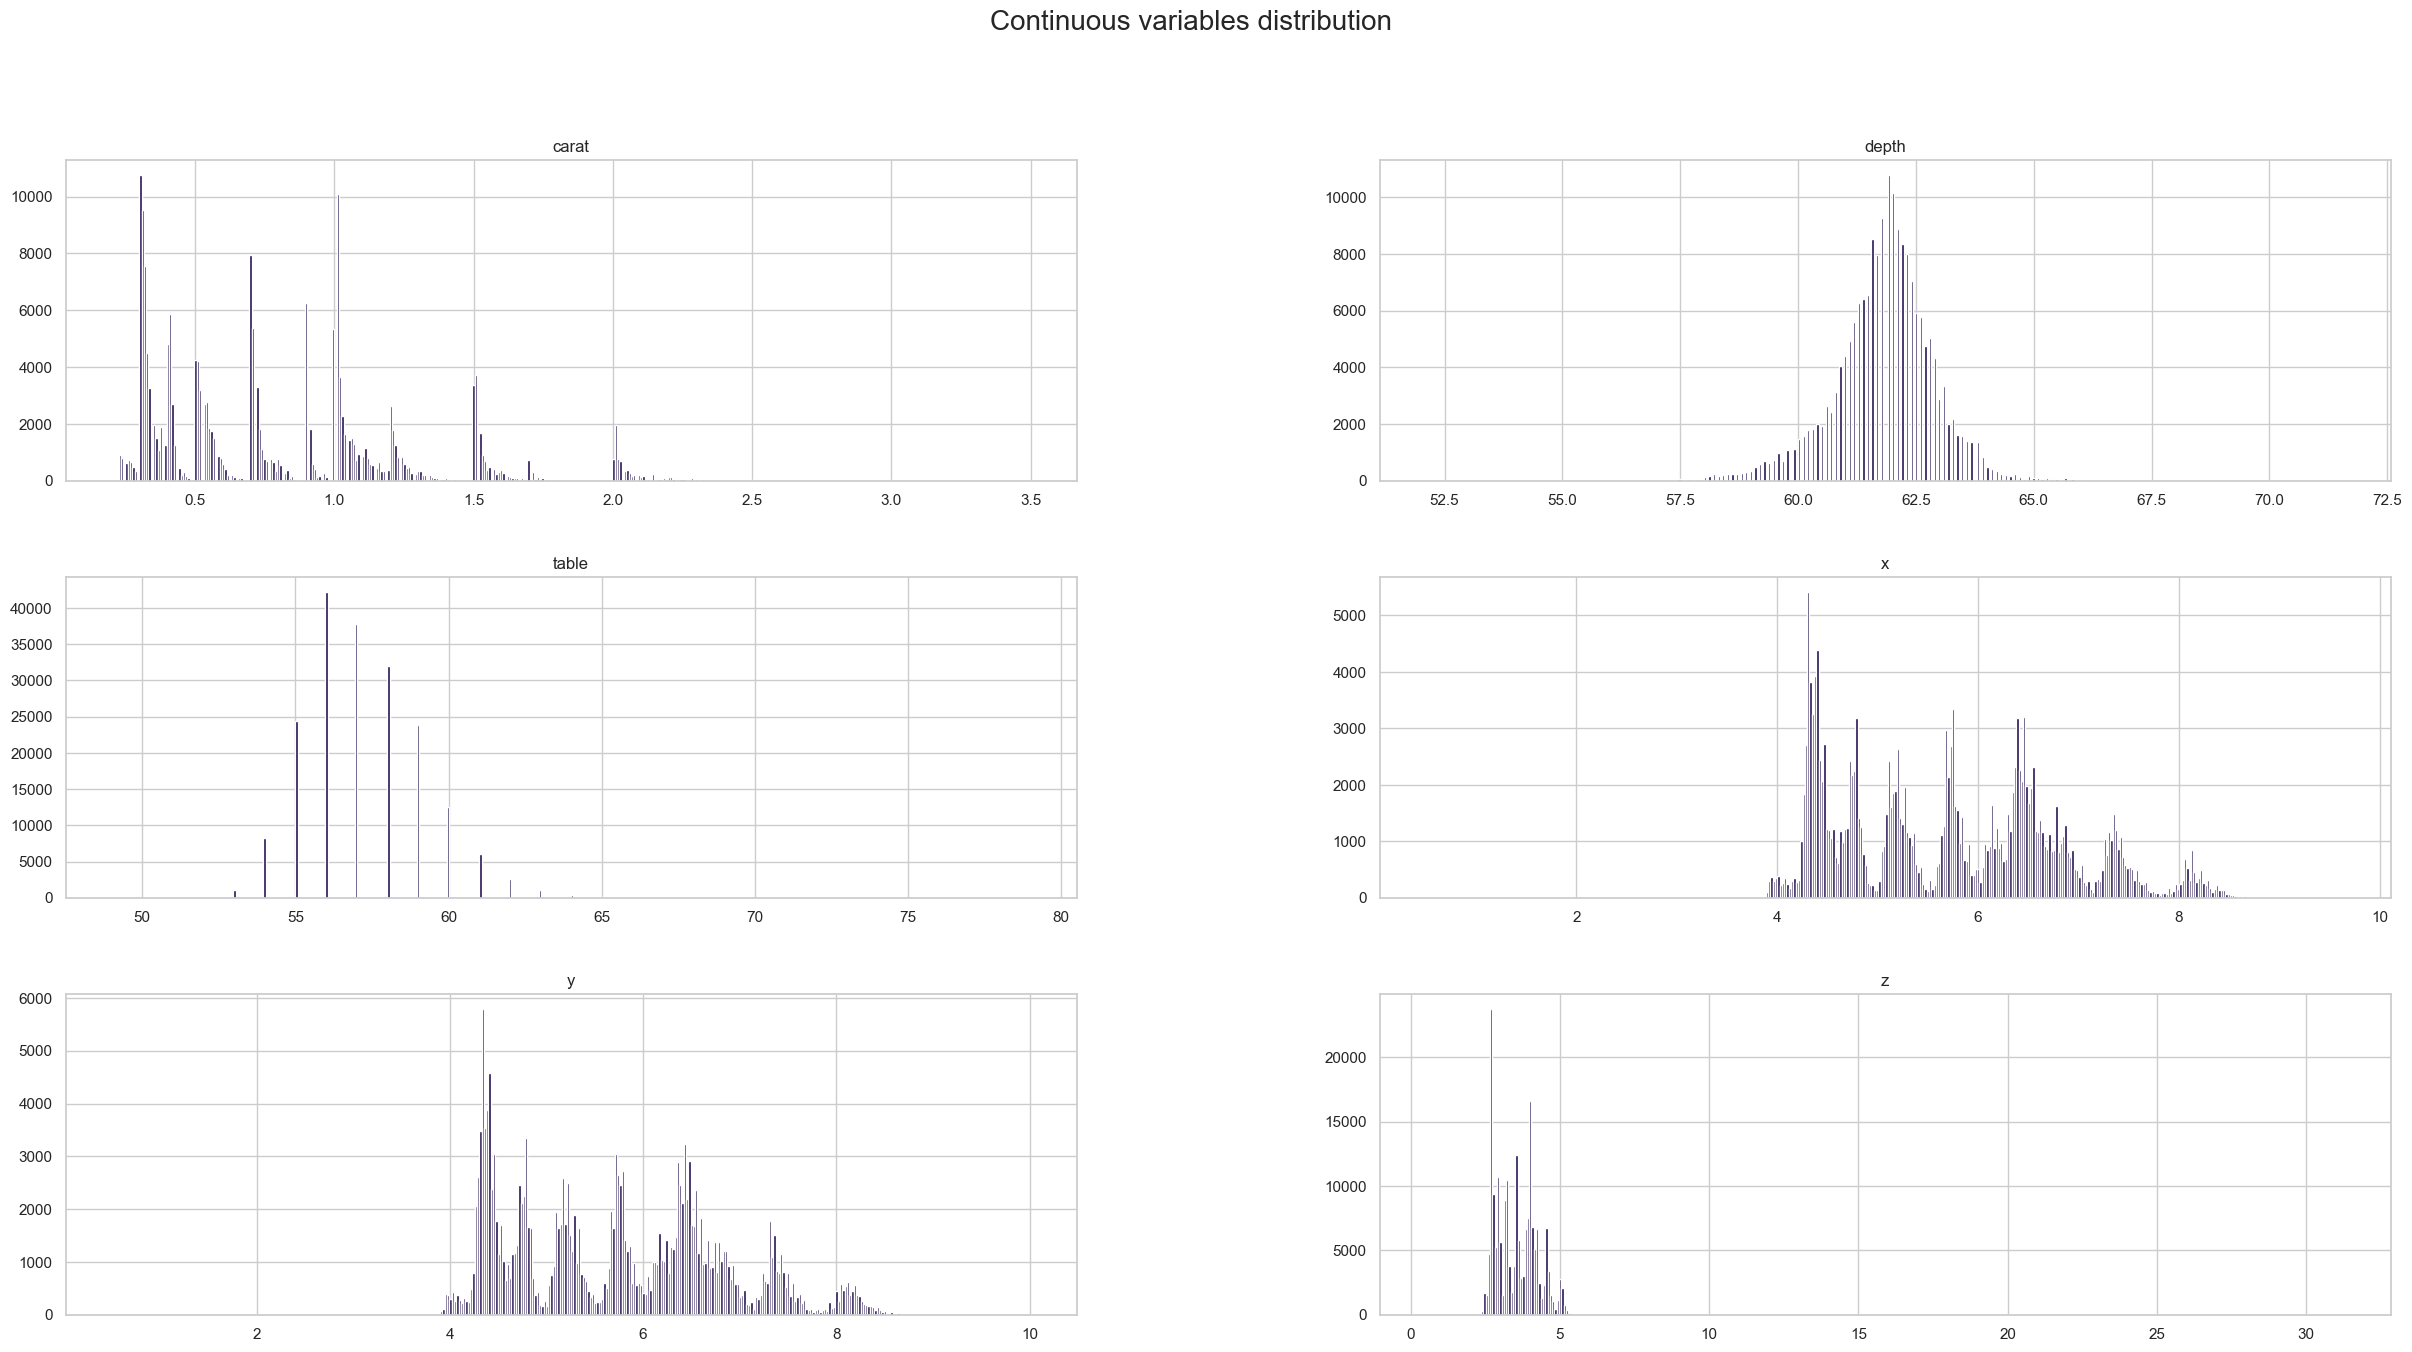

In [22]:
data[['carat', 'depth', 'table', 'x', 'y', 'z']].hist(bins=400, figsize=(30, 15))
plt.suptitle('Continuous variables distribution', size = 20)
plt.show()


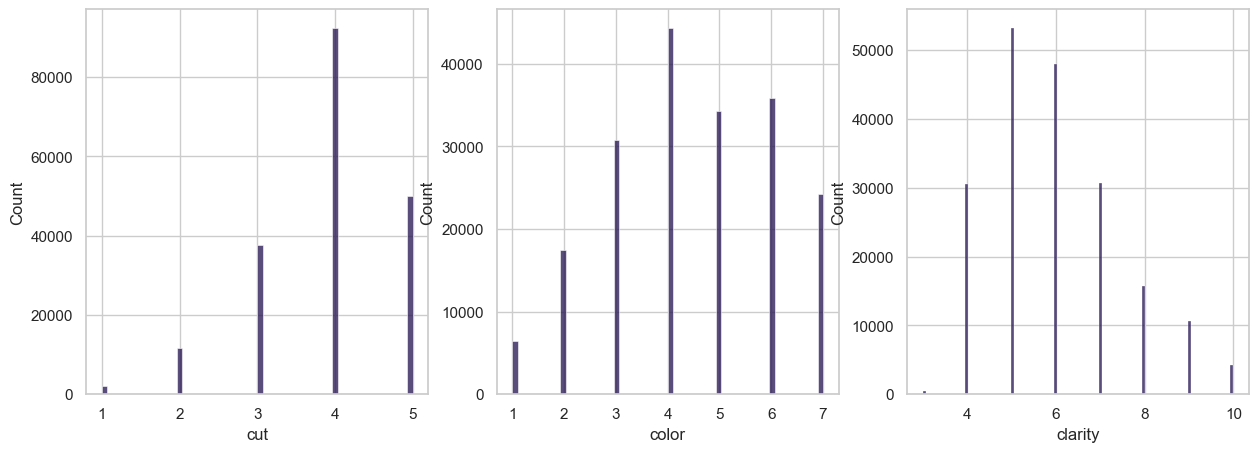

In [23]:
fig, axes = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
for i, col in enumerate(data[cat_features]):
    sns.histplot(x=col, data=data, ax=axes[i])

C:\Users\HP-K\AppData\Local\Temp\ipykernel_148\985558175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,palette='Dark2')
C:\Users\HP-K\AppData\Local\Temp\ipykernel_148\985558175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,palette='Dark2')
C:\Users\HP-K\AppData\Local\Temp\ipykernel_148\985558175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,palette='Dark2')


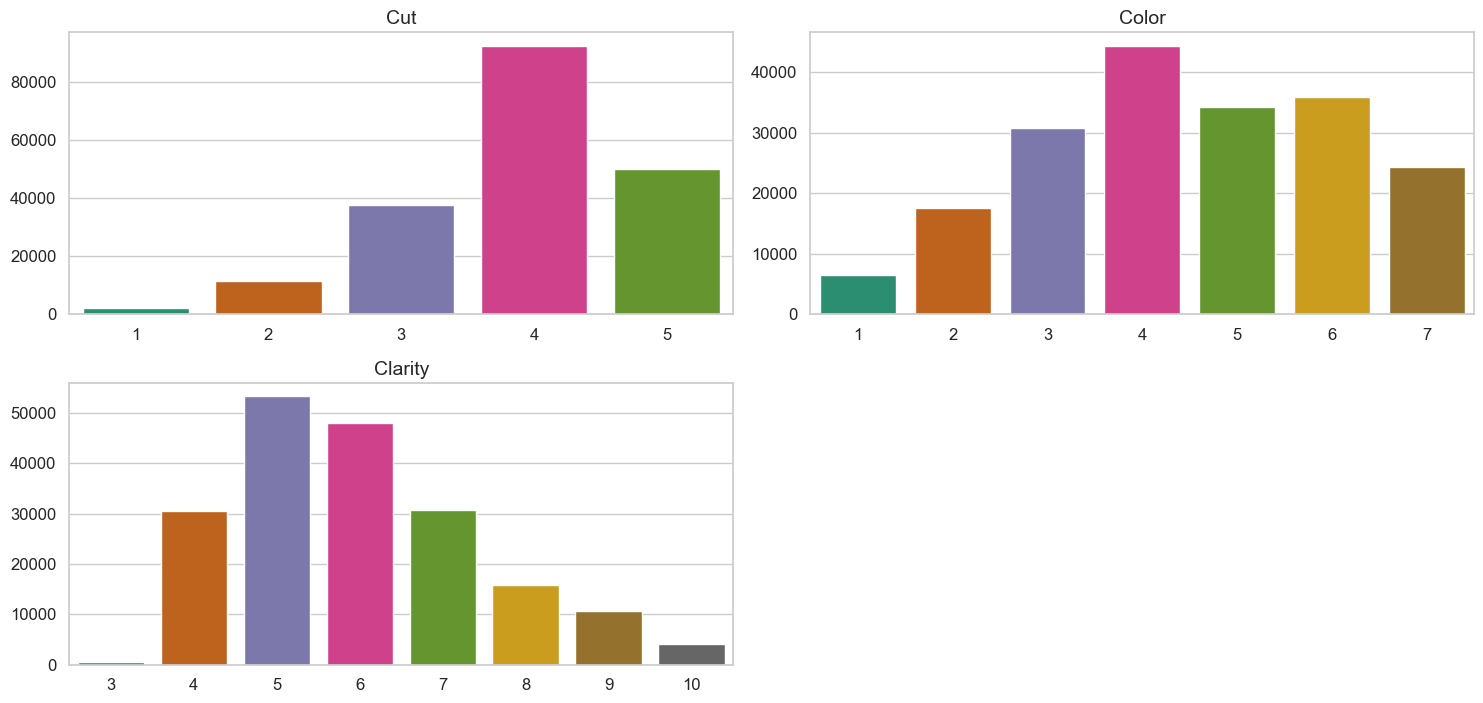

In [24]:
plt.figure(figsize=(15,70))
plotno=1
for i, col in enumerate(data[cat_features]):
    if plotno<=data.shape[1]:
        ax1=plt.subplot(20,2,plotno)
        sns.countplot(data=data,x=col,palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)

        
        plt.xlabel('')
        plt.ylabel('')
    plotno+=1
plt.tight_layout()
        

In [25]:
def new_features(df):
    df['volume'] = df['x'] * df['y'] * df['z']
    df['density'] = df['carat'] / df['volume']
    df['table_percentage'] = (df['table'] / ((df['x'] + df['y']) / 2)) * 100
    df['depth_percentage'] = (df['depth'] / ((df['x'] + df['y']) / 2)) * 100
    df['symmetry'] = (abs(df['x'] - df['z']) + abs(df['y'] - df['z'])) / (df['x'] + df['y'] + df['z'])
    df['surface_area'] = 2 * ((df['x'] * df['y']) + (df['x'] * df['z']) + (df['y'] * df['z']))
    df['depth_to_table_ratio'] = df['depth'] / df['table']
    
new_features(data)

display(data.columns)
data.tail(10)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'volume', 'density', 'table_percentage', 'depth_percentage',
       'symmetry', 'surface_area', 'depth_to_table_ratio'],
      dtype='object')

,carat,cut,color,clarity,depth,table,x,y,z,price,volume,density,table_percentage,depth_percentage,symmetry,surface_area,depth_to_table_ratio
193563,0.28,3,6,5,61.2,55.0,4.23,4.26,2.60,484,46.851480,0.005976,1295.641932,1441.696113,0.296664,80.1876,1.112727
193564,0.90,2,7,5,63.2,57.0,6.11,6.14,3.88,4919,145.559752,0.006183,930.612245,1031.836735,0.278363,170.0908,1.108772
193565,0.31,5,7,5,62.6,58.0,4.32,4.29,2.69,732,49.853232,0.006218,1347.270616,1454.123113,0.285841,83.3874,1.079310
193566,1.05,4,4,7,62.1,56.0,6.54,6.51,4.06,7397,172.856124,0.006074,858.237548,951.724138,0.288136,191.1168,1.108929
193567,0.58,4,6,6,61.8,57.0,5.33,5.36,3.31,1872,94.562728,0.006133,1066.417212,1156.220767,0.290714,127.9054,1.084211
193568,0.31,4,7,8,61.1,56.0,4.35,4.39,2.67,1130,50.987655,0.006080,1281.464531,1398.169336,0.297984,84.8646,1.091071
193569,0.70,5,4,8,60.3,58.0,5.75,5.77,3.47,2874,115.125925,0.006080,1006.944444,1046.875000,0.305537,146.3038,1.039655
193570,0.73,3,5,5,63.1,57.0,5.72,5.75,3.62,3036,119.061800,0.006131,993.897123,1100.261552,0.280318,148.8228,1.107018
193571,0.34,3,7,5,62.9,55.0,4.45,4.49,2.81,681,56.145205,0.006056,1230.425056,1407.158837,0.282553,90.2038,1.143636
193572,0.71,2,6,4,60.8,64.0,5.73,5.71,3.48,2258,113.859684,0.006236,1118.881119,1062.937063,0.300268,145.0590,0.950000


In [26]:
def new_features1(df):
    avg_refrac_index = 2.165 
    avg_disper_value = 0.062 

    df['depth_to_diameter_ratio'] = df['depth'] / ((df['x'] + df['y'] + 1e-6) / 2)
    #extending to:
    df['ddr_refrac_disper'] = df['depth_to_diameter_ratio'] * avg_refrac_index * avg_disper_value

    df['volume_to_surface_area_ratio'] = df['carat'] / df['table']
    df['vsa_refrac_disper'] = df['volume_to_surface_area_ratio'] * avg_refrac_index * avg_disper_value

    df['radius'] = np.sqrt(df["x"] ** 2 + df["y"] ** 2 + df["z"] ** 2)
    df['curv_refrac_disper'] = (avg_refrac_index * avg_disper_value) / df['radius'] 

    df['thickness'] = df['z'] - ((df['x'] + df['y'])/2)
    df['thick_refrac_disper'] = df['thickness'] * avg_refrac_index * avg_disper_value  
    #or divide refrac and disper 

new_features1(data)

In [27]:
data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price,...,surface_area,depth_to_table_ratio,depth_to_diameter_ratio,ddr_refrac_disper,volume_to_surface_area_ratio,vsa_refrac_disper,radius,curv_refrac_disper,thickness,thick_refrac_disper
0,1.52,5,5,6,62.2,58.0,7.27,7.33,4.55,13619,...,239.4382,1.072414,8.520547,1.143713,0.026207,0.003518,11.282034,0.011898,-2.750,-0.369133
1,2.03,3,1,4,62.0,58.0,8.06,8.12,5.05,13387,...,294.3124,1.068966,7.663782,1.028709,0.035000,0.004698,12.506019,0.010733,-3.040,-0.408059
2,0.70,4,4,7,61.2,57.0,5.69,5.73,3.50,2772,...,145.1474,1.073684,10.718038,1.438682,0.012281,0.001648,8.801079,0.015252,-2.210,-0.296648
3,0.32,4,4,7,61.6,56.0,4.38,4.41,2.71,666,...,86.2734,1.100000,14.015926,1.881358,0.005714,0.000767,6.780605,0.019796,-1.685,-0.226178
4,1.70,5,4,6,62.6,59.0,7.65,7.61,4.77,14453,...,262.0134,1.061017,8.204456,1.101284,0.028814,0.003868,11.797775,0.011378,-2.860,-0.383898
5,1.51,3,1,5,62.8,58.0,7.34,7.29,4.59,7506,...,241.3206,1.082759,8.585099,1.152378,0.026034,0.003495,11.317588,0.011860,-2.725,-0.365777
6,0.74,4,6,6,61.8,57.0,5.76,5.79,3.57,3229,...,149.1678,1.084211,10.701298,1.436435,0.012982,0.001743,8.913282,0.015060,-2.205,-0.295977
7,1.34,5,4,4,62.5,57.0,7.00,7.05,4.38,6224,...,221.7780,1.096491,8.896797,1.194217,0.023509,0.003156,10.857573,0.012363,-2.645,-0.355038
8,0.30,4,5,10,62.0,56.0,4.35,4.37,2.70,886,...,85.1070,1.107143,14.220182,1.908775,0.005357,0.000719,6.731226,0.019941,-1.660,-0.222822
9,0.30,2,1,7,63.6,57.0,4.26,4.28,2.72,421,...,82.9232,1.115789,14.894612,1.999304,0.005263,0.000706,6.623020,0.020267,-1.550,-0.208056


In [28]:
X = data.drop(['price'],axis=1)
y = data['price']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (193573, 24)
y shape: (193573,)


In [29]:
cat_cols=['cut', 'color', 'clarity']
pipeline = ColumnTransformer([
    ('cat', OrdinalEncoder(), cat_cols)
], remainder='passthrough')


In [30]:
transformed_data = pipeline.fit_transform(data)
#transformed_df = pd.DataFrame(transformed_data, columns=cat_cols + data.columns[len(cat_cols):])
transformed_df = pd.DataFrame(transformed_data, columns=cat_cols + list(data.columns[len(cat_cols):]))


In [31]:
transformed_df = transformed_df.drop(columns='price')

In [32]:
data_encoded = pd.concat([data.drop(columns=cat_cols), transformed_df.drop(columns=cat_cols)], axis=1)
data_encoded

,carat,depth,table,x,y,z,price,volume,density,table_percentage,...,surface_area,depth_to_table_ratio,depth_to_diameter_ratio,ddr_refrac_disper,volume_to_surface_area_ratio,vsa_refrac_disper,radius,curv_refrac_disper,thickness,thick_refrac_disper
0,1.52,62.2,58.0,7.27,7.33,4.55,13619,242.465405,0.006269,794.520548,...,239.4382,1.072414,8.520547,1.143713,0.026207,0.003518,11.282034,0.011898,-2.750,-0.369133
1,2.03,62.0,58.0,8.06,8.12,5.05,13387,330.508360,0.006142,716.934487,...,294.3124,1.068966,7.663782,1.028709,0.035000,0.004698,12.506019,0.010733,-3.040,-0.408059
2,0.70,61.2,57.0,5.69,5.73,3.50,2772,114.112950,0.006134,998.248687,...,145.1474,1.073684,10.718038,1.438682,0.012281,0.001648,8.801079,0.015252,-2.210,-0.296648
3,0.32,61.6,56.0,4.38,4.41,2.71,666,52.345818,0.006113,1274.175199,...,86.2734,1.100000,14.015926,1.881358,0.005714,0.000767,6.780605,0.019796,-1.685,-0.226178
4,1.70,62.6,59.0,7.65,7.61,4.77,14453,277.692705,0.006122,773.263434,...,262.0134,1.061017,8.204456,1.101284,0.028814,0.003868,11.797775,0.011378,-2.860,-0.383898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130,50.987655,0.006080,1281.464531,...,84.8646,1.091071,13.981692,1.876762,0.005536,0.000743,6.732273,0.019938,-1.700,-0.228191
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874,115.125925,0.006080,1006.944444,...,146.3038,1.039655,10.468749,1.405220,0.012069,0.001620,8.854169,0.015160,-2.290,-0.307387
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036,119.061800,0.006131,993.897123,...,148.8228,1.107018,11.002615,1.476881,0.012807,0.001719,8.881740,0.015113,-2.115,-0.283896
193571,0.34,62.9,55.0,4.45,4.49,2.81,681,56.145205,0.006056,1230.425056,...,90.2038,1.143636,14.071587,1.888829,0.006182,0.000830,6.917998,0.019403,-1.660,-0.222822


In [33]:
X_encoded = data_encoded.drop(['price'],axis=1)
y_encoded = data_encoded['price']

print("X shape:", X_encoded.shape)
print("y shape:", y_encoded.shape)

X shape: (193573, 41)
y shape: (193573,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=13)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_train.shape}, y_test shape: {y_train.shape}")

X_train shape: (154858, 41), y_train shape: (154858,)
X_test shape: (154858, 41), y_test shape: (154858,)


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [36]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    
    
}

In [37]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [38]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [39]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

    

    

model training performance LinearRegression()
MSE: 1355246.7155313715
MAE: 686.3039988059313
R2 SCORE: 0.9171961469762818




d:\mlopss\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+11, tolerance: 2.517e+08
  model = cd_fast.enet_coordinate_descent(


model training performance Lasso()
MSE: 1427126.9806231128
MAE: 695.5866036516338
R2 SCORE: 0.9128043540741099


model training performance Ridge()
MSE: 1400231.2617564898
MAE: 707.2932558989514
R2 SCORE: 0.9144476483366796




d:\mlopss\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+11, tolerance: 2.517e+08
  model = cd_fast.enet_coordinate_descent(


model training performance ElasticNet()
MSE: 1456632.4901795755
MAE: 699.9855259763663
R2 SCORE: 0.9110016049150792


model training performance RandomForestRegressor()
MSE: 1425603.9975484328
MAE: 686.1607969720458
R2 SCORE: 0.9128974064056361




In [51]:
def model()

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

scoring = {'neg_root_mean_squared_error': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))}

if CV_FLAG:
    models = [BaggingRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(),
              RandomForestRegressor(), HistGradientBoostingRegressor(),
              LinearRegression(), Ridge(), Lasso(), ElasticNet()]

    for model in models:
        cv_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring)
        print(f'{model}\'s mean score: {np.mean(cv_results["test_neg_root_mean_squared_error"])}\n')
